In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 

from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import SGDClassifier 

In [2]:
train_df = pd.read_csv(r'data\fashion-mnist_train.csv')
test_df = pd.read_csv(r'data\fashion-mnist_test.csv')

train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train_df.shape

(60000, 785)

In [4]:
train_df = train_df.sample(frac=0.3).reset_index(drop=True)
train_df.shape 

(18000, 785)

In [5]:
Variables = {0: 'T-shirt',
             1: 'Trouser',
             2: 'Pullover',
             3: 'Dress',
             4: 'Coat',
             5: 'Sandal',
             6: 'Shirt',
             7: 'Sneaker',
             8: 'bag',
             9: 'Ankle boot'}

In [6]:
def display_image(features, actual_label ):
    print("Actual label:", Variables[actual_label] )
    
    plt.imshow(features.reshape(28,28))

In [7]:
X = train_df[train_df.columns[1:]]
Y = train_df['label']

In [8]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,1,...,22,7,10,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,110,67,0,118,204,186,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,51,0,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,30,0,0,0,0,0


In [9]:
Y.head()

0    0
1    2
2    8
3    2
4    2
Name: label, dtype: int64

In [10]:
X.loc[5].values[:100]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  88, 102, 107,
       106,  78,  95,  88,  77,  73,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1, 215,
       198, 213, 253, 213, 255, 220, 133, 127,  15,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        20, 201, 180, 169, 207, 150, 146, 160, 150, 177,  29,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,  47, 190, 176, 175, 203, 169, 154], dtype=int64)

In [11]:
Y.loc[5]

1

Actual label: Trouser


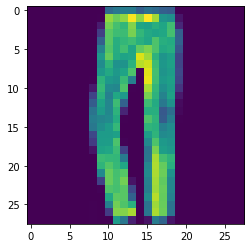

In [12]:
display_image(X.loc[5].values, Y.loc[5])

In [13]:
X = X/25 
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.04,...,0.88,0.28,0.4,0.00,0.00,0.00,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,...,4.40,2.68,0.0,4.72,8.16,7.44,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,...,2.04,0.00,0.0,0.00,0.00,0.08,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,...,0.08,0.00,0.0,0.00,0.00,0.04,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04,0.04,0.00,...,0.00,0.00,0.0,0.00,1.20,0.00,0.0,0.0,0.0,0.0


In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [15]:
X_train.shape, X_test.shape

((14400, 784), (3600, 784))

In [16]:
Y_train.shape, Y_test.shape

((14400,), (3600,))

In [35]:
def summarize_classification(Y_test, Y_pred):
    acc = accuracy_score(Y_test, Y_pred, normalize=True)
    num_acc =accuracy_score(Y_test, Y_pred, normalize=False)
    
    prec = precision_score(Y_test, Y_pred, average='weighted')
    recall = recall_score(Y_test, Y_pred, average='weighted')
    
    print ("Numero de datos de prueba:",len (Y_test))
    print ("precisión:", num_acc)
    print ("Puntuación de precisión:", acc )
    print ("Puntuación recordada", recall)

In [49]:
logistic_model = LogisticRegression(solver= 'sag', multi_class='auto', max_iter= 20).fit(X_train,Y_train)

C:\WINDOWS\system32\MLenv\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [50]:
Y_pred = logistic_model.predict(X_test)
Y_pred

array([6, 6, 4, ..., 3, 0, 8], dtype=int64)

In [51]:
summarize_classification(Y_test, Y_pred)

Numero de datos de prueba: 3600
precisión: 3042
Puntuación de precisión: 0.845
Puntuación recordada 0.845
